# Bias vs Variance
In this notebook we will create a simulation example to understand better bias vs variance tradeoff.

## Terminology
Suppose we have training set consisting of   
$X$ : Vector of **N** observations of independent variable.  
$Y$ : Vector of **N** observations of dependent variable.  
And assume $Y$ is related to $X$ by a function $f(X)$ and noise $\epsilon$.  
$Y = f(X) + \epsilon$ where $\epsilon \sim \mathcal{N}(0, \sigma^2)$. 

Lets assume we take a subsets of $X$ and $Y$, $X_\mathcal{D}$ and $Y_\mathcal{D}$ and we fit a model to that subset and the fitted model is $\hat{f}(X_\mathcal{D})$.   
For a new data point $x$ and $y$ outside of $X$ and $Y$.

MSE = $\mathbb{E}[(y-\hat{f}(x))^2 ]$, where Expectation is over all the possible $D$ sets from the training set.   

$\begin{align}
\mathbb{E}[(y-\hat{f}(x))^2 ] &= \mathbb{E}[(f(x)-\hat{f}(x) + \epsilon)^2 ] \\
     &= \mathbb{E}[(f(x)-\hat{f}(x)+\epsilon+\mathbb{E}[\hat{f}(x)]-\mathbb{E}[\hat{f}(x)])^2] \\
     &= \mathbb{E}[(f(x)-\mathbb{E}[\hat{f}(x)]+\epsilon+\mathbb{E}[\hat{f}(x)]-\hat{f}(x))^2] \\
     &= \mathbb{E}[(f(x)-\mathbb{E}[\hat{f}(x)])^2] + \mathbb{E}[\epsilon^2] + \mathbb{E}[(\mathbb{E}[\hat{f}(x)]-\hat{f}(x))^2] \\ 
     &+ 2\mathbb{E}[\epsilon (f(x) - \mathbb{E}[\hat{f}(x))] + 2\mathbb{E}[\epsilon (\mathbb{E}[\hat{f}(x)]-\hat{f}(x))] + 2\mathbb{E}[(f(x)-\mathbb{E}[\hat{f}(x)])(\mathbb{E}[\hat{f}(x)]-\hat{f}(x)]]
\end{align}$

Using $\mathbb{E}(\epsilon) = 0$, $\mathbb{E}[f(x)] = f(x)$ and $\mathbb{E}[\mathbb{E}[\hat{f}(x)]]=\mathbb{E}[\hat{f}(x)]$, we get   

$\begin{align}
\mathbb{E}[(y-\hat{f}(x))^2] &= \underbrace{\mathbb{E}[(f(x)-\mathbb{E}[\hat{f}(x)])^2]}_{Bias} + \underbrace{\sigma^2 }_{\text{Irreducible Error}}+ \underbrace{\mathbb{E}[(\mathbb{E}[\hat{f}(x)]-\hat{f}(x))^2]}_{Variance}
\end{align}$

Lets make an example and see these terms numerically.

$f(X) = X^4-5X^2+4$   
$Y = f(X) + \epsilon \sim \mathcal{N}(0, \sigma^2 = 0.1^2)$

In [3]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

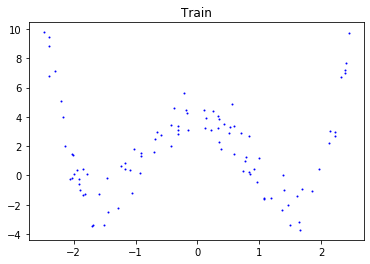

In [64]:
np.random.seed(0) #Set the seed for deterministic answers
N_train = 100
N_test = 100
sigma = 1
X_train = np.sort(np.random.uniform(-2.5,2.5,N_train)) #Create X_train vector of N entries 
epsilon_train = np.random.normal(loc=0.0, scale=sigma, size=N_train) #Create epsilon with sigma 0.1
X2_train = np.square(X_train)
Y_train = np.square(X2_train) - 5*X2_train + 4 + epsilon_train
plt.plot(X_train, Y_train, 'bo', markersize=1)
plt.title('Train')

X_test = np.random.uniform(-2.5,2.5,N_test)
epsilon_test = np.random.normal(loc=0.0, scale=sigma, size=N_test)
X2_test = np.square(X_test)
Y_test = np.square(X2_test) - 5*X2_test + 4 + epsilon_test

In [86]:
#fit polynomials of degree 1, 2, 3, 4, 5, 10 and 100 to the data.
#And lets measure the mean square error in train and test set
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

degree = range(1, 30)
mses_train = []
mses_test = []
for deg in degree:
    polynomial_features= PolynomialFeatures(degree=deg) #Use sklearn polynomialfeatures to generate polynomial features
    xp_train = polynomial_features.fit_transform(X_train.reshape(N_train,1))
    xp_test = polynomial_features.fit_transform(X_test.reshape(N_test,1))
    
    model = sm.OLS(Y_train, xp_train).fit() #Fit an OLS model
    
    ypred_train = model.predict(xp_train) #Make a prediction in the train data
    ypred_test = model.predict(xp_test) #Make a prediction on the test data
    mse_train = np.sum(np.square(ypred_train - Y_train)) / N_train #Mean square error in train data
    mses_train.append(mse_train)
    mse_test = np.sum(np.square(ypred_test - Y_test)) / N_test #Mean square error in test data
    mses_test.append(mse_test)
    

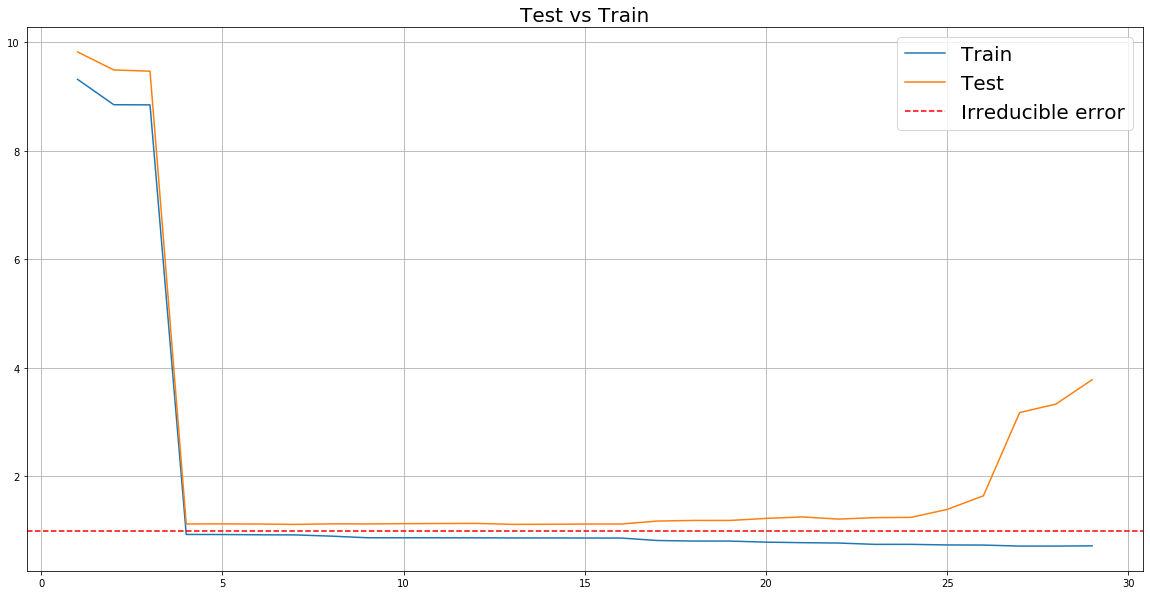

In [96]:
#Plot the Mean square error of test and train set
plt.figure(figsize=(20,10))
plt.title('Test vs Train', fontsize=20)
plt.plot(degree, mses_train, label='Train')
plt.plot(degree, mses_test, label='Test')
plt.axhline(y=1, color='r', linestyle='--',label='Irreducible error')
plt.grid()
plt.legend(fontsize=20)

We can see from the plot above as the model complexity goes up train error keeps on going down, but test error starts going up. Test error also stays above **irreducible** error.